##  머신러닝 개요

In [1]:
import os 
os.cpu_count()

16

In [2]:
import tensorflow as tf

w = tf.Variable(4.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [3]:
with tf.GradientTape() as tape:
    z = f(w)

In [4]:
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=16.0>]


## 자동 미분을 이용한 선형 회귀 구현

In [5]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [6]:
@tf.function
def hypothesis(x):
    return w*x + b

In [7]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [8]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [9]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]            # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]   # 각 공부하는 시간에 맵핑되는 성적

In [10]:
optimizer = tf.optimizers.SGD(0.01)

In [11]:
for i in range(501):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(x)

        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)
        
    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w, b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if i % 1 == 0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :   1 | w의 값 : 9.6918 | b의 값 : 1.894 | cost : 173.778214
epoch :   2 | w의 값 : 10.2109 | b의 값 : 1.972 | cost : 22.584137
epoch :   3 | w의 값 : 10.3935 | b의 값 : 1.996 | cost : 3.978573
epoch :   4 | w의 값 : 10.4581 | b의 값 : 2.001 | cost : 1.687088
epoch :   5 | w의 값 : 10.4812 | b의 값 : 1.999 | cost : 1.402939
epoch :   6 | w의 값 : 10.4898 | b의 값 : 1.996 | cost : 1.365802
epoch :   7 | w의 값 : 10.4934 | b의 값 : 1.991 | cost : 1.359064
epoch :   8 | w의 값 : 10.4951 | b의 값 : 1.987 | cost : 1.356095
epoch :   9 | w의 값 : 10.4962 | b의 값 : 1.982 | cost : 1.353601
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  11 | w의 값 : 10.4979 | b의 값 : 1.972 | cost : 1.348798
epoch :  12 | w의 값 : 10.4987 | b의 값 : 1.967 | cost : 1.346424
epoch :  13 | w의 값 : 10.4995 | b의 값 : 1.963 | cost : 1.344076
epoch :  14 | w의 값 : 10.5002 | b의 값 : 1.958 | cost : 1.341748
epoch :  15 | w의 값 : 10.5010 | b의 값 : 1.953 | cost : 1.339434
epoc

epoch : 171 | w의 값 : 10.5874 | b의 값 : 1.409 | cost : 1.137280
epoch : 172 | w의 값 : 10.5878 | b의 값 : 1.407 | cost : 1.136648
epoch : 173 | w의 값 : 10.5882 | b의 값 : 1.404 | cost : 1.136021
epoch : 174 | w의 값 : 10.5885 | b의 값 : 1.402 | cost : 1.135395
epoch : 175 | w의 값 : 10.5889 | b의 값 :   1.4 | cost : 1.134774
epoch : 176 | w의 값 : 10.5893 | b의 값 : 1.397 | cost : 1.134159
epoch : 177 | w의 값 : 10.5897 | b의 값 : 1.395 | cost : 1.133552
epoch : 178 | w의 값 : 10.5901 | b의 값 : 1.392 | cost : 1.132947
epoch : 179 | w의 값 : 10.5905 | b의 값 :  1.39 | cost : 1.132350
epoch : 180 | w의 값 : 10.5909 | b의 값 : 1.387 | cost : 1.131752
epoch : 181 | w의 값 : 10.5912 | b의 값 : 1.385 | cost : 1.131164
epoch : 182 | w의 값 : 10.5916 | b의 값 : 1.383 | cost : 1.130579
epoch : 183 | w의 값 : 10.5920 | b의 값 :  1.38 | cost : 1.130002
epoch : 184 | w의 값 : 10.5924 | b의 값 : 1.378 | cost : 1.129426
epoch : 185 | w의 값 : 10.5927 | b의 값 : 1.376 | cost : 1.128853
epoch : 186 | w의 값 : 10.5931 | b의 값 : 1.373 | cost : 1.128291
epoch : 

epoch : 346 | w의 값 : 10.6366 | b의 값 : 1.099 | cost : 1.078207
epoch : 347 | w의 값 : 10.6368 | b의 값 : 1.098 | cost : 1.078054
epoch : 348 | w의 값 : 10.6370 | b의 값 : 1.097 | cost : 1.077906
epoch : 349 | w의 값 : 10.6372 | b의 값 : 1.096 | cost : 1.077757
epoch : 350 | w의 값 : 10.6374 | b의 값 : 1.095 | cost : 1.077611
epoch : 351 | w의 값 : 10.6376 | b의 값 : 1.093 | cost : 1.077464
epoch : 352 | w의 값 : 10.6378 | b의 값 : 1.092 | cost : 1.077324
epoch : 353 | w의 값 : 10.6380 | b의 값 : 1.091 | cost : 1.077176
epoch : 354 | w의 값 : 10.6381 | b의 값 :  1.09 | cost : 1.077036
epoch : 355 | w의 값 : 10.6383 | b의 값 : 1.089 | cost : 1.076900
epoch : 356 | w의 값 : 10.6385 | b의 값 : 1.088 | cost : 1.076760
epoch : 357 | w의 값 : 10.6387 | b의 값 : 1.086 | cost : 1.076617
epoch : 358 | w의 값 : 10.6389 | b의 값 : 1.085 | cost : 1.076479
epoch : 359 | w의 값 : 10.6391 | b의 값 : 1.084 | cost : 1.076343
epoch : 360 | w의 값 : 10.6393 | b의 값 : 1.083 | cost : 1.076210
epoch : 361 | w의 값 : 10.6394 | b의 값 : 1.082 | cost : 1.076078
epoch : 

### 3. 케라스로 구현하는 선형 회귀

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(learning_rate=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 250ms/step - loss: 3490.0554 - mse: 3490.0554
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 430.4780 - mse: 430.4780
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 54.0189 - mse: 54.0189
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 7.6976 - mse: 7.6976
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 1.9971 - mse: 1.9971
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2947 - mse: 1.2947
Epoch 7/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2073 - mse: 1.2073
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1955 - mse: 1.1955
Epoch 9/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1931 - mse: 1.1931
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1919 - mse: 1.1919
Epoch 11/300
1/1 [==============================] - 0s 6ms/step -

1/1 [==============================] - 0s 7ms/step - loss: 1.1288 - mse: 1.1288
Epoch 90/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1282 - mse: 1.1282
Epoch 91/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1276 - mse: 1.1276
Epoch 92/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1271 - mse: 1.1271
Epoch 93/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1265 - mse: 1.1265
Epoch 94/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1260 - mse: 1.1260
Epoch 95/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1254 - mse: 1.1254
Epoch 96/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1249 - mse: 1.1249
Epoch 97/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1244 - mse: 1.1244
Epoch 98/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1238 - mse: 1.1238
Epoch 99/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1233 - ms

1/1 [==============================] - 0s 6ms/step - loss: 1.0763 - mse: 1.0763
Epoch 264/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0762 - mse: 1.0762
Epoch 265/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0761 - mse: 1.0761
Epoch 266/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0759 - mse: 1.0759
Epoch 267/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0758 - mse: 1.0758
Epoch 268/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0757 - mse: 1.0757
Epoch 269/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0755 - mse: 1.0755
Epoch 270/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0754 - mse: 1.0754
Epoch 271/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0753 - mse: 1.0753
Epoch 272/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0751 - mse: 1.0751
Epoch 273/300
1/1 [==============================] - 0s 6ms/step - loss: 1

1/1 [==============================] - 0s 147ms/step


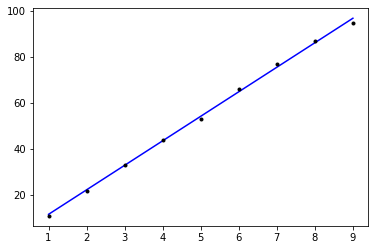

In [15]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [16]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 60ms/step
[[102.17538]]


In [17]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_config',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_check_call_args',
 '_check_sample_wei

In [23]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[10.645349]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([1.0445668], dtype=float32)>]

102.1753755

### 2. 시그모이드 함수(Sigmoid function)

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-9.0, 9.0, 0.1)
y = sigmoid(x)


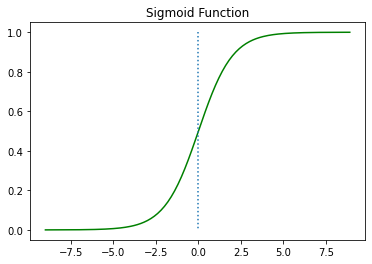

In [37]:
plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

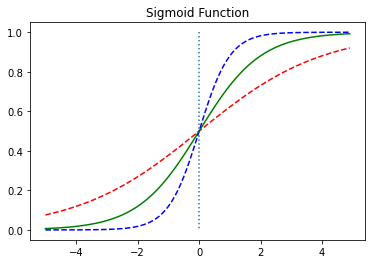

In [40]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()